In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [21]:
overdoses = pd.read_excel('https://www.drugabuse.gov/sites/default/files/overdose_data_1999-2015.xls',sheetname='Online',skiprows =6)
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [22]:
%matplotlib notebook
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
overdose.columns = {title}

In [41]:
# Writer = animation.writers['ffmpeg']
writer = animation.FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800)

<IPython.core.display.Javascript object>


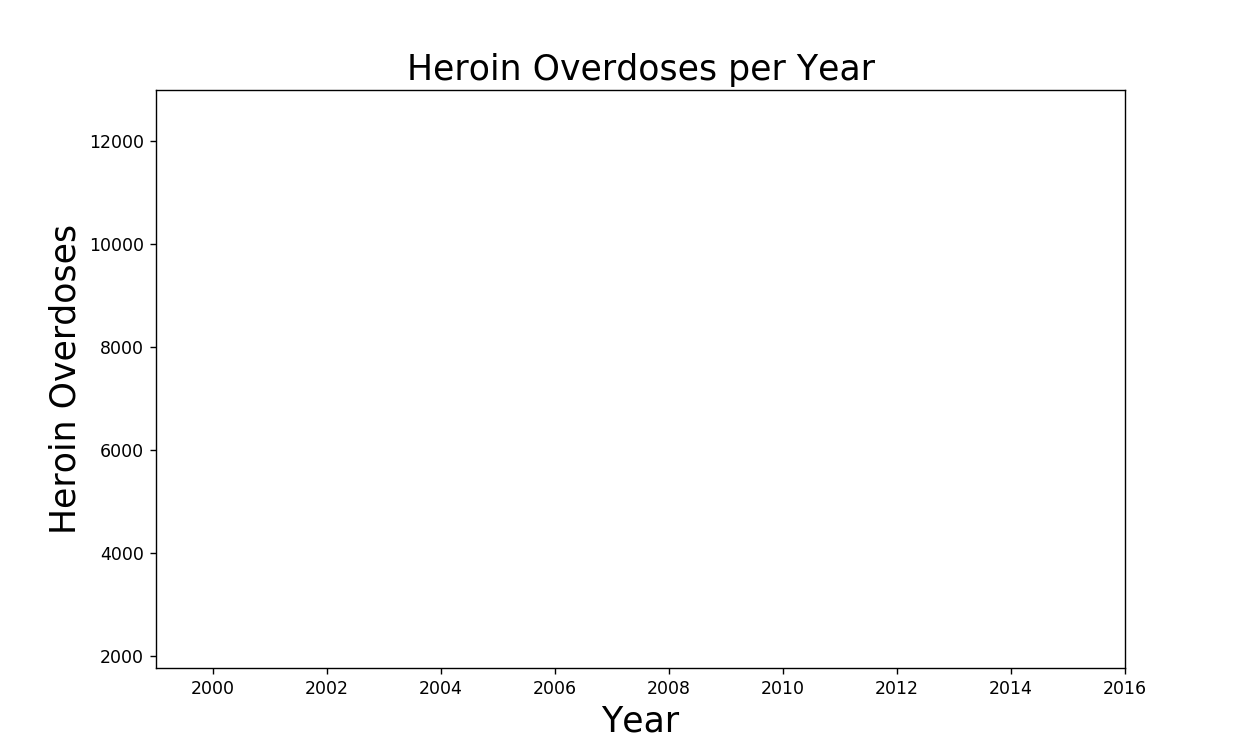

In [42]:
fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)

plt.show()

In [36]:
def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)

In [43]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)

In [44]:
ani.save('HeroinOverdosesJumpy.mp4', writer=writer)

PermissionError: [WinError 5] Access is denied